<a href="https://colab.research.google.com/github/TheRustic53/tarea2-prob_y_est/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [241]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
import math

Link del CSV: https://drive.google.com/file/d/1avJM5xzjz2AGu59R_pry09pbRI27MhNR/view?usp=drive_link

In [242]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

file_id = '1avJM5xzjz2AGu59R_pry09pbRI27MhNR'

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# How do I import the file now?
downloaded = drive.CreateFile({'id': file_id})
contenido = downloaded.GetContentString()
contenido_bytes = contenido.encode('utf-8')
print("Descargados {} bytes".format(len(contenido)))

Descargados 1466471 bytes


In [243]:
#Aquí se carga el archivo a la carpeta de colab local.
with open("example.csv", "wb") as f:
    f.write(contenido_bytes)

In [244]:
#Seleccionar copiar ruta del archivo y pegar en la función
data = pd.read_csv('/content/example.csv', delimiter=";")

#Se crea una copia para futuras operaciones
dataDummy = pd.read_csv('/content/example.csv', delimiter=";")
dataDummy2 = pd.read_csv('/content/example.csv', delimiter=";")

print(data)

           ID  anio  mes  Sexo  Edad  region  PEA  Desempleo    Salario
0      115581  2022    1     2    75       1    0          0          0
1      115591  2022    1     1    31       1    1          0  109189.48
2      115592  2022    1     2    29       1    1          0   37189.48
3      115601  2022    1     2    26       1    1          0  154189.48
4      115611  2022    1     2    50       1    1          0   93189.48
...       ...   ...  ...   ...   ...     ...  ...        ...        ...
46517  345021  2022   12     2    39       3    1          0      12000
46518  345022  2022   12     1    19       3    0          0          0
46519  345031  2022   12     1    66       3    0          0          0
46520  345032  2022   12     2    54       3    0          0          0
46521  345033  2022   12     1    24       3    1          0   22976.35

[46522 rows x 9 columns]


# **Estadística Descriptiva**
# 1 - Desempleo

# 1-a

In [245]:
#Se calcula la tasa de desempleo con la formula dada en la letra
pea = data.PEA.sum()
desempleo = data.Desempleo.sum()

tasa_desempleo = desempleo/pea
print("La tasa de desempleo de la muestra es de ", tasa_desempleo)

La tasa de desempleo de la muestra es de  0.0754425348691716


# 1-b

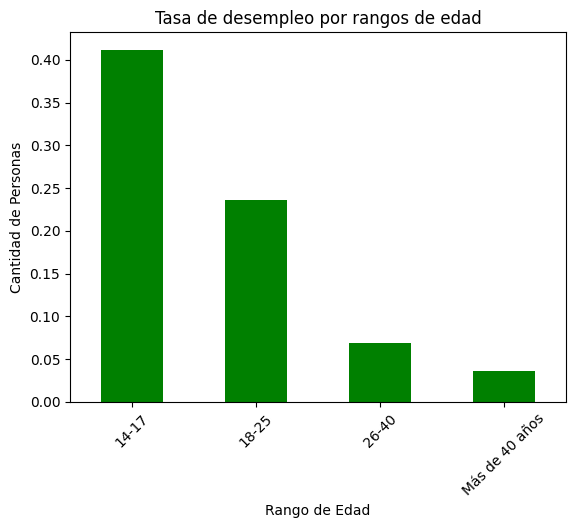

In [246]:
#Se crean las categorías de rangos de edad
bins = [13, 17, 25, 40, data['Edad'].max()]
labels = ['14-17', '18-25', '26-40', 'Más de 40 años']

#Se agrega una columna con la categoría de rango de edad
data['Rango Edad'] = pd.cut(data['Edad'], bins=bins, labels=labels)

#Se crea un DataFrame por cada rango etario

dataRango0 = data[(data['Rango Edad'] == '14-17')]
dataRango1 = data[(data['Rango Edad'] == '18-25')]
dataRango2 = data[(data['Rango Edad'] == '26-40')]
dataRango3 = data[(data['Rango Edad'] == 'Más de 40 años')]

#Se calcula la cantidad de desempleados en cada rango
desempleoRango0 = dataRango0['Desempleo'].sum()
desempleoRango1 = dataRango1['Desempleo'].sum()
desempleoRango2 = dataRango2['Desempleo'].sum()
desempleoRango3 = dataRango3['Desempleo'].sum()

#Se calcula la PEA en cada rango
peaRango0 = dataRango0['PEA'].sum()
peaRango1 = dataRango1['PEA'].sum()
peaRango2 = dataRango2['PEA'].sum()
peaRango3 = dataRango3['PEA'].sum()

#Se calcula la tasa de desempleo en cada rango
tasaDesempleoRango0 = desempleoRango0 / peaRango0
tasaDesempleoRango1 = desempleoRango1 / peaRango1
tasaDesempleoRango2 = desempleoRango2 / peaRango2
tasaDesempleoRango3 = desempleoRango3 / peaRango3

#Se agregan las tasas de desempleo a un array y se pasa a una serie para graficar
tasas = []
tasas.append(tasaDesempleoRango0)
tasas.append(tasaDesempleoRango1)
tasas.append(tasaDesempleoRango2)
tasas.append(tasaDesempleoRango3)

tasasSerie = pd.Series(data=tasas)

#Se grafica el resultado
tasasSerie.plot(kind='bar', color='green')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Personas')
plt.title('Tasa de desempleo por rangos de edad')
plt.xticks(ticks=[0, 1, 2, 3], labels=labels, rotation=45)
plt.show()

# 2 - Salario

# 2-a

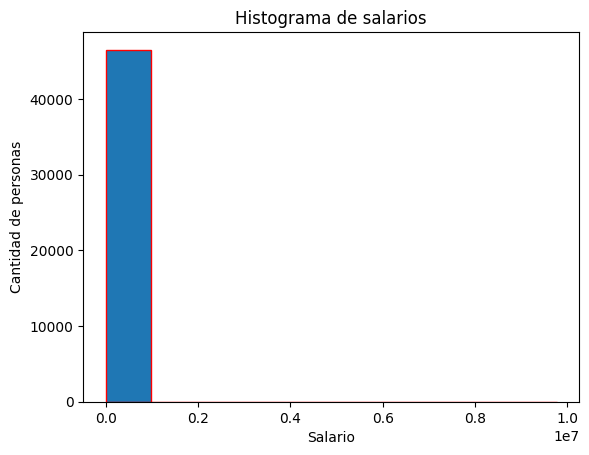

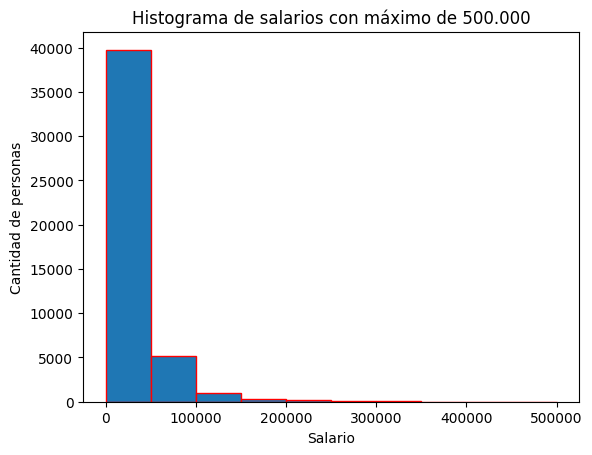

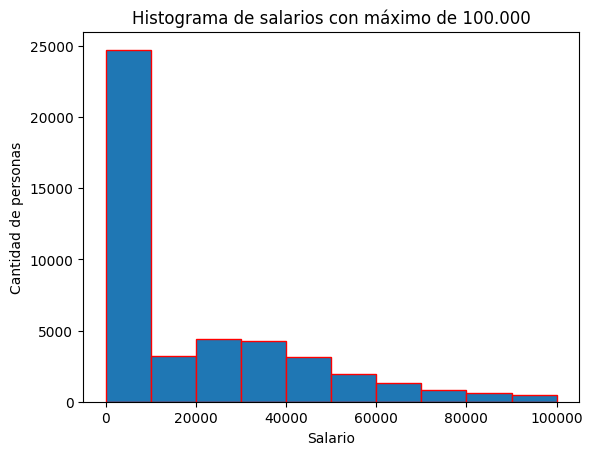

In [247]:
#Se normalizan los datos, dado que hay algunos que no son numéricos (por ejemplo 1,24E+14)
data['Salario'] = pd.to_numeric(data['Salario'], errors='coerce').fillna(0)
data['Salario'] = data['Salario'].astype(int)

#Se grafica el histograma
data['Salario'].plot(kind='hist', edgecolor='red')
plt.title('Histograma de salarios')
plt.xlabel('Salario')
plt.ylabel('Cantidad de personas')
plt.show()

#Se setea el salario máximo para evitar valores excentricos
salarioMaximo = 500000
dataSalarioMaximo = data[data['Salario'] <= salarioMaximo]

#Se grafica el histograma con el salario topeado en $500000
dataSalarioMaximo['Salario'].plot(kind='hist', edgecolor='red')
plt.title('Histograma de salarios con máximo de 500.000')
plt.xlabel('Salario')
plt.ylabel('Cantidad de personas')
plt.show()

#Setear un salario maximo menor para ver la distribución con valores más pequeños
salarioMaximo2 = 100000
dataSalarioMaximo2 = data[data['Salario'] <= salarioMaximo2]

#Se grafica el histograma con el salario topeado en $100000
dataSalarioMaximo2['Salario'].plot(kind='hist', edgecolor='red')
plt.title('Histograma de salarios con máximo de 100.000')
plt.xlabel('Salario')
plt.ylabel('Cantidad de personas')
plt.show()

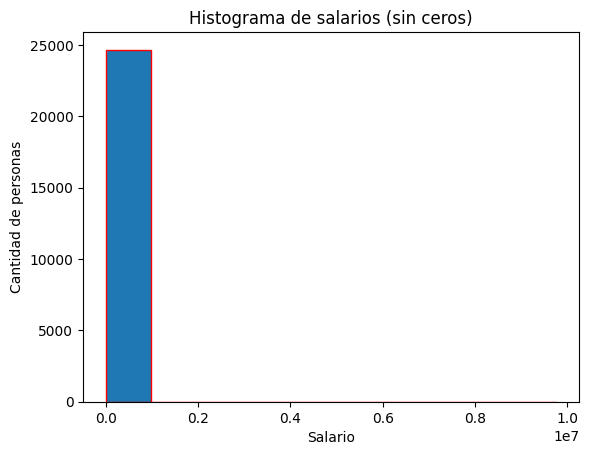

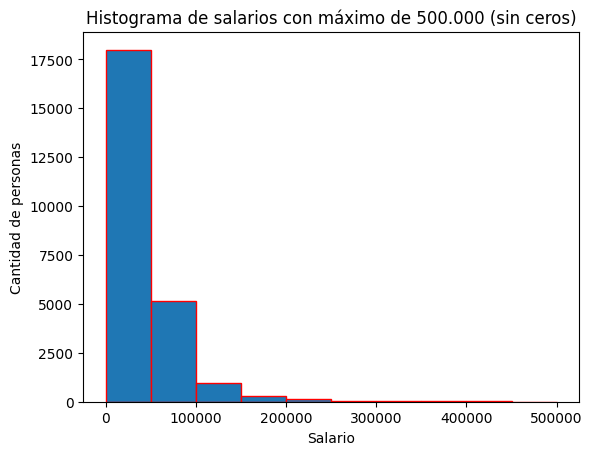

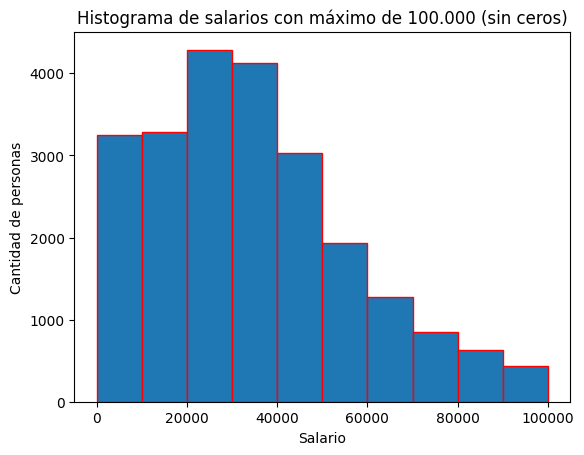

In [248]:
#Se utiliza el dataframe auxiliar para quitar todos las personas con salarios 0 o no numéricos
dataDummy['Salario'] = pd.to_numeric(dataDummy['Salario'], errors='coerce').fillna(0)
dataDummy['Salario'] = dataDummy['Salario'].astype(int)
dataDummy = dataDummy.drop(dataDummy[dataDummy.Salario < 1].index)

#Se realiza el mismo procedimiento pero con el dataframe auxiliar
dataDummy['Salario'].plot(kind='hist', edgecolor='red')
plt.title('Histograma de salarios (sin ceros)')
plt.xlabel('Salario')
plt.ylabel('Cantidad de personas')
plt.show()

#Se setea el salario máximo para evitar valores excentricos
salarioMaximoAux = 500000
dataSalarioMaximoAux = dataDummy[dataDummy['Salario'] <= salarioMaximoAux]

#Se grafica el histograma con el salario topeado en $500000
dataSalarioMaximoAux['Salario'].plot(kind='hist', edgecolor='red')
plt.title('Histograma de salarios con máximo de 500.000 (sin ceros)')
plt.xlabel('Salario')
plt.ylabel('Cantidad de personas')
plt.show()

#Se setea un salario maximo menor para ver la distribución con valores más pequeños
salarioMaximo2Aux = 100000
dataSalarioMaximo2Aux = dataDummy[dataDummy['Salario'] <= salarioMaximo2Aux]

#Se grafica el histograma con el salario topeado en $100000
dataSalarioMaximo2Aux['Salario'].plot(kind='hist', edgecolor='red')
plt.title('Histograma de salarios con máximo de 100.000 (sin ceros)')
plt.xlabel('Salario')
plt.ylabel('Cantidad de personas')
plt.show()

# 2-b

<Axes: >

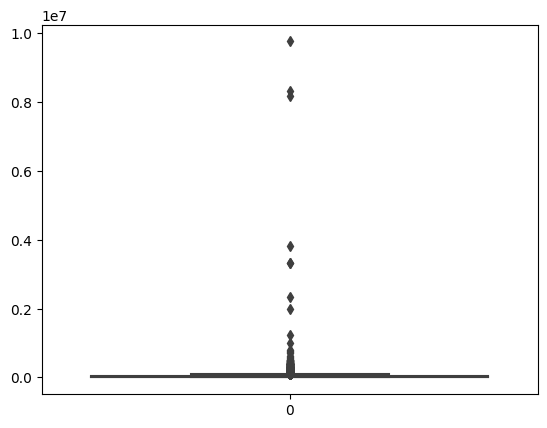

In [249]:
#Box-plot para toda la muestra, donde claramente aparecen valores excentricos
sns.boxplot(data['Salario'])

# 2-b-ii

El cuartil 1 vale 0.00
El cuartil 3 vale 34801.00
El rango superior para deteccion de datos atipicos vale 87002.50


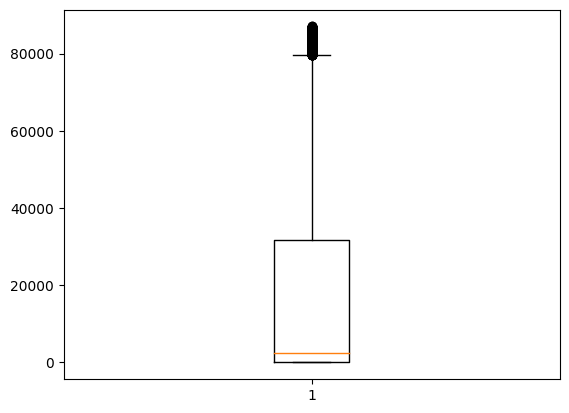

In [250]:
#Para corregirlos se topea el salario maximo en base a los cuartiles 1 y 3 y se eliminan los valores fuera de ellos de la muestra

#Se calculan los cuartiles 1 y 3
columna=['Salario']
Q1Salario = data['Salario'].quantile(0.25)
Q3Salario = data['Salario'].quantile(0.75)
IQRSalario = Q3Salario - Q1Salario
rangoMaxSalarios = Q3Salario + 1.5 * IQRSalario

print("El cuartil 1 vale %.2f" %Q1Salario)
print("El cuartil 3 vale %.2f" %Q3Salario)
print("El rango superior para deteccion de datos atipicos vale %.2f" %rangoMaxSalarios)

#Se crea un DataFrame con los valores de salario topeados por los cuartiles
condicion = ~((data[columna] < (Q1Salario - 1.5 * IQRSalario)) | (data[columna] > (Q3Salario + 1.5 * IQRSalario))).any(axis=1)
dataSalarioTopeado = data[condicion]

#Se grafica el salario con dicha condicion
plt.boxplot(dataSalarioTopeado['Salario'])
plt.show()

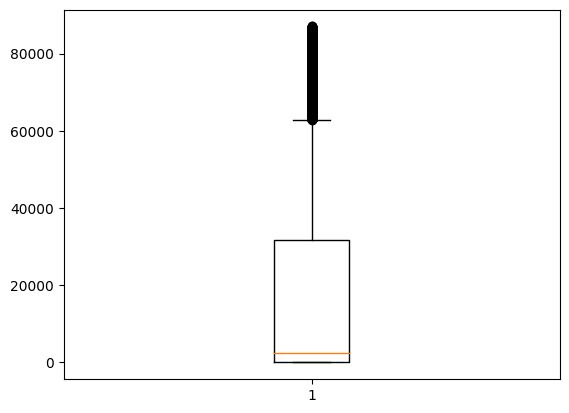

In [251]:
#Se excluyen los datos mayores a 400 con el parametro whis
plt.boxplot(dataSalarioTopeado['Salario'], whis = [5, 95])
plt.show()

# 2-c

In [252]:
#Media del salario
#Tener en cuenta que esta media incluye los valores 0 de las personas que no tienen empleo
print("La media del salario de la muestra es", data['Salario'].mean())

#Se calcula la media del salario con el Dataframe sin los valores 0 y no numéricos
print("La media del salario de la muestra sin los valores 0 es", dataDummy['Salario'].mean())

La media del salario de la muestra es 23585.561390309962
La media del salario de la muestra sin los valores 0 es 44458.974351701785


In [253]:
#Mediana
print("La mediana del salario de la muestra es", data['Salario'].median())

#Mediana sin salarios cero
print("La mediana del salario de la muestra sin los valores 0 es", dataDummy['Salario'].median())

La mediana del salario de la muestra es 4500.0
La mediana del salario de la muestra sin los valores 0 es 33221.5


In [254]:
#Moda
#Debido a la cantidad de personas sin salario, la moda dará 0
print("La moda del salario de la muestra es", pd.Series(data['Salario'].values.flatten()).mode()[0])

#Moda sin salarios cero
print("La moda del salario de la muestra sin los valores 0 es", pd.Series(dataDummy['Salario'].values.flatten()).mode()[0])

La moda del salario de la muestra es 0
La moda del salario de la muestra sin los valores 0 es 20000


#2-d

In [255]:
#Minimo
#Debido a que hay personas sin salario, el minimo dará 0
print("El salario minimo de la muestra es", data['Salario'].min())

#Minimo sin salarios cero
print("El salario minimo de la muestra sin los valores 0 es", dataDummy['Salario'].min())

#Minimo sin salarios cero y empezando desde un valor arbitrario (cambiar el 500 a otro valor para ver el cambio)

dataDummy2['Salario'] = pd.to_numeric(dataDummy2['Salario'], errors='coerce').fillna(0)
dataDummy2['Salario'] = dataDummy2['Salario'].astype(int)
dataDummy2 = dataDummy2.drop(dataDummy2[dataDummy2.Salario < 500].index)

print("El salario minimo de la muestra con valores de al menos 500 es", dataDummy2['Salario'].min())

El salario minimo de la muestra es 0
El salario minimo de la muestra sin los valores 0 es 50
El salario minimo de la muestra con valores de al menos 500 es 500


In [256]:
#Maximo
print("El salario maximo de la muestra es", data['Salario'].max())

#El máximo en el otro dataframe será el mismo dado que solo se quitaron los valores 0
print("El salario maximo de la muestra sin los valores 0 es", dataDummy['Salario'].max())

El salario maximo de la muestra es 9765833
El salario maximo de la muestra sin los valores 0 es 9765833


In [257]:
#Cuartiles
#El Cuartil 1 y el 3 ya fueron calculados anteriormente
#Debido a la cantidad de valores 0, el cuartil 1 vale 0
Q0Salario = data['Salario'].quantile(0)
Q2Salario = data['Salario'].quantile(0.50)
Q4Salario = data['Salario'].quantile(1)

print("El cuartil 0 del dataframe principal vale %.2f" %Q0Salario)
print("El cuartil 1 del dataframe principal vale %.2f" %Q1Salario)
print("El cuartil 2 del dataframe principal vale %.2f" %Q2Salario)
print("El cuartil 3.75 del dataframe principal vale %.2f" %Q3Salario)
print("El cuartil 4 del dataframe principal vale %.2f" %Q4Salario)

El cuartil 0 del dataframe principal vale 0.00
El cuartil 1 del dataframe principal vale 0.00
El cuartil 2 del dataframe principal vale 4500.00
El cuartil 3.75 del dataframe principal vale 34801.00
El cuartil 4 del dataframe principal vale 9765833.00


In [258]:
#Se calculan también los cuartiles del otro DataFrame para ver la diferencia
Q0SalarioAux = dataDummy['Salario'].quantile(0)
Q1SalarioAux = dataDummy['Salario'].quantile(0.25)
Q2SalarioAux = dataDummy['Salario'].quantile(0.50)
Q3SalarioAux = dataDummy['Salario'].quantile(0.75)
Q4SalarioAux = dataDummy['Salario'].quantile(1)

print("El cuartil 0 del dataframe auxiliar vale %.2f" %Q0SalarioAux)
print("El cuartil 1 del dataframe auxiliar vale %.2f" %Q1SalarioAux)
print("El cuartil 2 del dataframe auxiliar vale %.2f" %Q2SalarioAux)
print("El cuartil 3 del dataframe auxiliar vale %.2f" %Q3SalarioAux)
print("El cuartil 4 del dataframe auxiliar vale %.2f" %Q4SalarioAux)

El cuartil 0 del dataframe auxiliar vale 50.00
El cuartil 1 del dataframe auxiliar vale 20000.00
El cuartil 2 del dataframe auxiliar vale 33221.50
El cuartil 3 del dataframe auxiliar vale 52809.00
El cuartil 4 del dataframe auxiliar vale 9765833.00


# 2-e-i

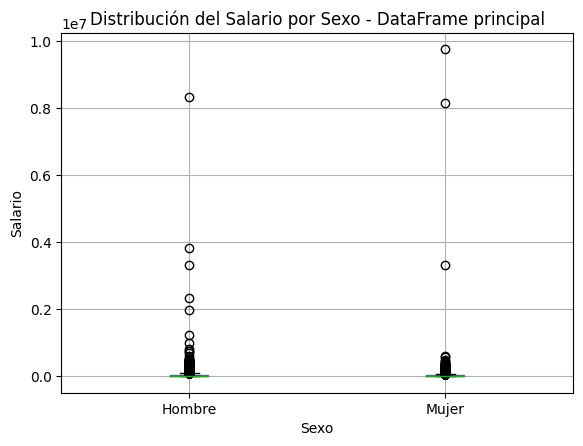

In [259]:
#Se grafica un boxplot mostrando el salario diferenciado por sexo con diferentes DataFrames

#Usando el Dataframe principal

data.boxplot(column='Salario', by='Sexo')
plt.xlabel('Sexo')
plt.ylabel('Salario')
plt.title('Distribución del Salario por Sexo - DataFrame principal')
plt.suptitle('')
plt.xticks([1, 2], ['Hombre', 'Mujer'])
plt.show()

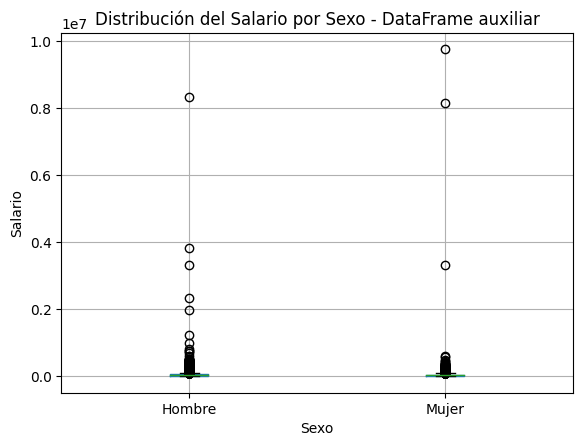

In [260]:
#Usando el Dataframe auxiliar

dataDummy.boxplot(column='Salario', by='Sexo')
plt.xlabel('Sexo')
plt.ylabel('Salario')
plt.title('Distribución del Salario por Sexo - DataFrame auxiliar')
plt.suptitle('')
plt.xticks([1, 2], ['Hombre', 'Mujer'])
plt.show()

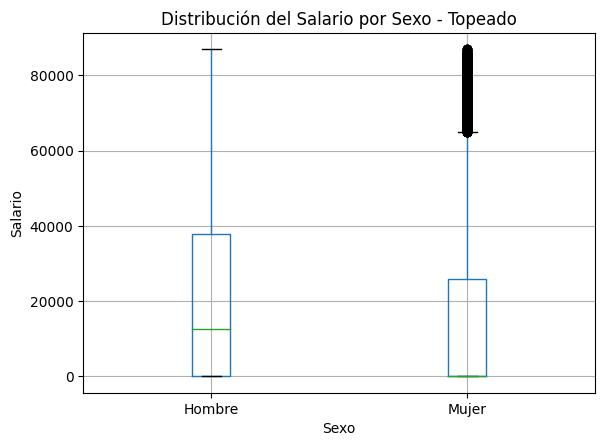

In [261]:
#Usando el Dataframe principal con el salario topeado entre los cuartiles 1 y 3 de la muestra principal
dataSalarioTopeado.boxplot(column='Salario', by='Sexo')
plt.xlabel('Sexo')
plt.ylabel('Salario')
plt.title('Distribución del Salario por Sexo - Topeado')
plt.suptitle('')
plt.xticks([1, 2], ['Hombre', 'Mujer'])
plt.show()

# 2-e-ii

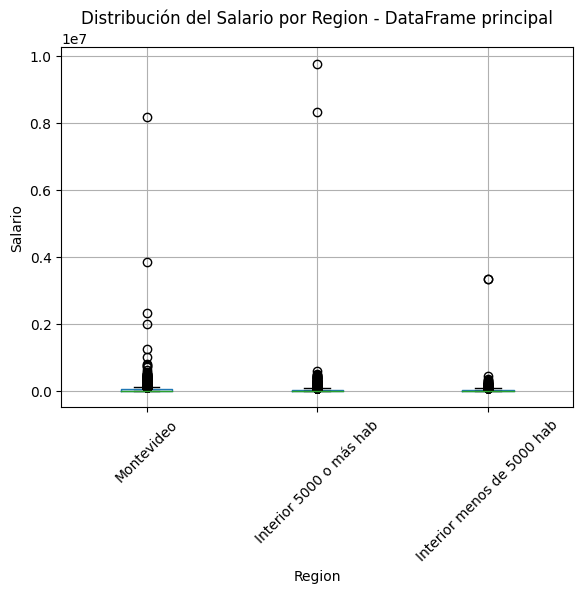

In [262]:
#Se grafica un boxplot mostrando el salario diferenciado por region

#Usando el Dataframe principal
data.boxplot(column='Salario', by='region')
plt.xlabel('Region')
plt.ylabel('Salario')
plt.title('Distribución del Salario por Region - DataFrame principal')
plt.suptitle('')
plt.xticks([1, 2, 3], ['Montevideo', 'Interior 5000 o más hab', 'Interior menos de 5000 hab'], rotation=45)
plt.show()

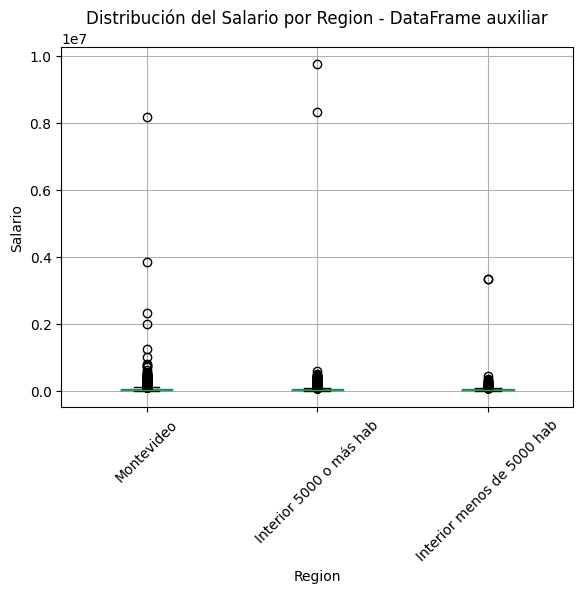

In [263]:
#Usando el Dataframe auxiliar
dataDummy.boxplot(column='Salario', by='region')
plt.xlabel('Region')
plt.ylabel('Salario')
plt.title('Distribución del Salario por Region - DataFrame auxiliar')
plt.suptitle('')
plt.xticks([1, 2, 3], ['Montevideo', 'Interior 5000 o más hab', 'Interior menos de 5000 hab'], rotation=45)
plt.show()

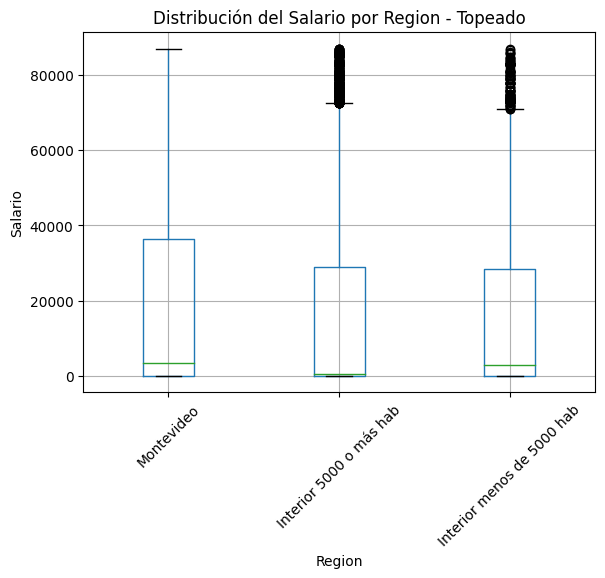

In [264]:
#Usando el Dataframe principal con el salario topeado entre los cuartiles 1 y 3 de la muestra principal
dataSalarioTopeado.boxplot(column='Salario', by='region')
plt.xlabel('Region')
plt.ylabel('Salario')
plt.title('Distribución del Salario por Region - Topeado')
plt.suptitle('')
plt.xticks([1, 2, 3], ['Montevideo', 'Interior 5000 o más hab', 'Interior menos de 5000 hab'], rotation=45)
plt.show()

# **B- Estimación**
# 1-

In [265]:
#Estimación del Desempleo total = PEA * tasa de desempleo de la muestra
poblacionTotal = 1757161
poblacionMuestra = 46521
estimacionDesempleo = poblacionTotal * tasa_desempleo
print("Se estima que el desempleo del total de la poblacion es de", estimacionDesempleo.round(), "personas")

Se estima que el desempleo del total de la poblacion es de 132565.0 personas


# 2-

In [266]:
#Se calcula la tasa de desempleo y la desviación típica de la muestra
print("La tasa de desempleo en la muestra es de", tasa_desempleo)

desviacionTipica = data['Desempleo'].std()
print("La desviación típica en la muestra es de", desviacionTipica)

La tasa de desempleo en la muestra es de 0.0754425348691716
La desviación típica en la muestra es de 0.20524214826657294


In [267]:
#Se calcula el valor de p con la distribución t-Studend con n-1 grados de libertad
tresult = stats.ttest_1samp(data['Desempleo'], tasa_desempleo)
print("El resultado de la t de Student para esta muestra es", tresult.statistic)
print("El valor p asociado a esta función es", tresult.pvalue)
print("Los grados de libertad de la muestra son", tresult.df)

El resultado de la t de Student para esta muestra es -32.97456360261543
El valor p asociado a esta función es 9.918295929607394e-236
Los grados de libertad de la muestra son 46521


In [268]:
#Se calcula el intervalo de confianza con los datos obtenidos en la parte anterior
nivelConfianza = 0.95
intervaloConfianza = stats.t.interval(nivelConfianza, df=poblacionMuestra-1, loc=tasa_desempleo, scale=desviacionTipica/math.sqrt(poblacionMuestra))

print("Intervalo de confianza al", nivelConfianza*100, "%:", intervaloConfianza)

Intervalo de confianza al 95.0 %: (0.07357743787718314, 0.07730763186116006)


# **C - Prueba de Hipótesis**

# 1-

In [269]:
#H0) Tasa de desempleo 2021 > Tasa de desempleo 2022
#H1) Tasa de desempleo 2021 <= Tasa de desempleo 2022

tasaDesempleo2021 = 0.07

tHipo = stats.ttest_1samp(tasa_desempleo, tasaDesempleo2021, alternative='greater')
print("El valor p de la t de Student da", tHipo.pvalue)
print("La t de Student con estos datos da ", tHipo.statistic)

#Se realiza la prueba de hipótesis
if tHipo.statistic > tHipo.pvalue:
    resultadoHipotesis = "Se rechaza la hipótesis H0 dado que la tasa de desempleo ha aumentado respecto al año anterior."
else:
    resultadoHipotesis = "No se rechaza la hipótesis H0 dado que no hay suficiente evidencia para concluir que la tasa de desempleo ha aumentado."

print("Resultado de la prueba de hipótesis:", resultadoHipotesis)

El valor p de la t de Student da nan
La t de Student con estos datos da  nan
Resultado de la prueba de hipótesis: No se rechaza la hipótesis H0 dado que no hay suficiente evidencia para concluir que la tasa de desempleo ha aumentado.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:502: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


# 2-

In [270]:
#H0) Salario de hombres = Salario de mujeres
#H1) Salario de hombres != Salario de mujeres

#Se utiliza la muestra auxiliar, que quita valores 0 y erróneos
#Se calcula la media de los salarios diferenciando por género

mediaSalarios = dataDummy.groupby('Sexo')['Salario'].mean()

#print(mediaSalarios)
mediaHombres = mediaSalarios.values[0]
mediaMujeres = mediaSalarios.values[1]

print("Media de salarios para hombres:", mediaHombres)
print("Media de salarios para mujeres:", mediaMujeres)

Media de salarios para hombres: 48968.42128061747
Media de salarios para mujeres: 39680.834682466826


In [271]:
#Se separan los salarios por género
salariosHombres = dataDummy[dataDummy['Sexo'] == 1]['Salario']
salariosMujeres = dataDummy[dataDummy['Sexo'] == 2]['Salario']

#print(salariosHombres.count)
#print(salariosMujeres.count)

#Realizar la prueba de hipótesis de dos colas

#Debido a que la cantidad de valores es diferente para ambas muestras, se debe usar un t test de Welch, indicandolo con el parametro equal_var=False

hipotesis2 = stats.ttest_ind(salariosHombres, salariosMujeres, equal_var=False)

nivelConfianza = 0.99
alfa = 1- nivelConfianza

print("Estadístico t:", hipotesis2.statistic)
print("Valor p:", hipotesis2.pvalue)
if hipotesis2.pvalue < alfa:
  print("No hay diferencias significativas entre los salarios, por lo que no se puede descartar H0")
else:
  print("Se rechaza H0 dado que la diferencia de salarios es significativa")

Estadístico t: 6.37672661551045
Valor p: 1.8432583200724884e-10
No hay diferencias significativas entre los salarios, por lo que no se puede descartar H0
